**Autor:** Carlos Hernández

### Importación de datos



In [1]:
from unidecode import unidecode
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# Análisis exploratorio de datos

Homogeneizar nombre de columnas de los cuatro conjunto de datos

In [3]:
lista_set_datos = [tienda,tienda2,tienda3,tienda4]

for set_datos in lista_set_datos:
    set_datos.columns = set_datos.columns.str.lower().str.replace(" ","_").str.strip()

Eliminar tildes

In [4]:
for set_datos in lista_set_datos:
    set_datos.columns = [unidecode(columna) for columna in set_datos.columns] 


Estándarizar tipos de datos

Corregir fecha

In [5]:
for columna_fecha in lista_set_datos: 
    columna_fecha["fecha_de_compra"] = pd.to_datetime(columna_fecha["fecha_de_compra"], format="%d/%m/%Y", errors="coerce")

Corregir tipo de datos objecto a categórico 

In [6]:
# seleccionar columnas objecto
column_object = tienda.select_dtypes("object").columns.tolist()

for df in lista_set_datos:
    df[column_object] = df[column_object].astype("category")
    

# Análisis de facturación

En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [7]:
num_tienda = 1
lista_ingresos = []

for tiendita in lista_set_datos:
    ingreso_total = tiendita["precio"].sum()

    print(f"\n🏪Tienda {num_tienda}")
    print(f"ingreso total C$ {ingreso_total}")
    num_tienda+=1 # indice de tienda

    lista_ingresos.append(ingreso_total) #guardar ingresos


    print("_"*33)


🏪Tienda 1
ingreso total C$ 1150880400.0
_________________________________

🏪Tienda 2
ingreso total C$ 1116343500.0
_________________________________

🏪Tienda 3
ingreso total C$ 1098019600.0
_________________________________

🏪Tienda 4
ingreso total C$ 1038375700.0
_________________________________


In [8]:
(max(lista_ingresos), min(lista_ingresos))

(np.float64(1150880400.0), np.float64(1038375700.0))

# Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [9]:
num_tienda = 1
for set_datos in lista_set_datos:
    ventas_categoria = set_datos["categoria_del_producto"].value_counts().sort_values(ascending=False)
    ventas_categoria = ventas_categoria.reset_index()
    ventas_categoria.columns = ["Categoria","| Uds. Vend"]

    print(f"\n🏪Tienda {num_tienda}")
    print(f"🛒Las tres categorías más populares son: \n{ventas_categoria.head(3)}")
    num_tienda+=1
    print("_"*33)


🏪Tienda 1
🛒Las tres categorías más populares son: 
      Categoria  | Uds. Vend
0       Muebles          465
1  Electrónicos          448
2      Juguetes          324
_________________________________

🏪Tienda 2
🛒Las tres categorías más populares son: 
      Categoria  | Uds. Vend
0       Muebles          442
1  Electrónicos          422
2      Juguetes          313
_________________________________

🏪Tienda 3
🛒Las tres categorías más populares son: 
      Categoria  | Uds. Vend
0       Muebles          499
1  Electrónicos          451
2      Juguetes          315
_________________________________

🏪Tienda 4
🛒Las tres categorías más populares son: 
      Categoria  | Uds. Vend
0       Muebles          480
1  Electrónicos          451
2      Juguetes          338
_________________________________


# Valoración media por clientes

En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [10]:
num_tienda = 1
lista_calif_prom = []

for set_datos in lista_set_datos:
    calif_prom = set_datos["calificacion"].mean() #calificación de satisfacción promedio

    print(f"\n🏪Tienda {num_tienda}")
    print(f"⭐ Nivel de satisfacción promedio :{calif_prom:.2f}")

    print("_"*40)
    num_tienda+=1

    lista_calif_prom.append(calif_prom)


🏪Tienda 1
⭐ Nivel de satisfacción promedio :3.98
________________________________________

🏪Tienda 2
⭐ Nivel de satisfacción promedio :4.04
________________________________________

🏪Tienda 3
⭐ Nivel de satisfacción promedio :4.05
________________________________________

🏪Tienda 4
⭐ Nivel de satisfacción promedio :4.00
________________________________________


# Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [11]:
pd.set_option("display.max_rows", None)

num_tienda = 1

for set_datos in lista_set_datos:

    prod_men_vend = set_datos.producto.value_counts().tail(4)
    prod_men_vend = prod_men_vend.reset_index()
    prod_men_vend.columns = ["Producto","Ventas"]

    prod_mas_vend = set_datos.producto.value_counts().head(4)
    prod_mas_vend = prod_mas_vend.reset_index()
    prod_mas_vend.columns = ["Producto","Ventas"]

    print(f"\n🏪Tienda {num_tienda}")
    print(f"🛒Desepeño de los productos")
    print(f"📉Menos vendidos\n{prod_men_vend}")
    print("."*35)
    print(f"📈Más vendidos\n{prod_mas_vend}")

    print("_"*35)
    num_tienda+=1



🏪Tienda 1
🛒Desepeño de los productos
📉Menos vendidos
                    Producto  Ventas
0                  Pandereta      36
1            Olla de presión      35
2               Celular ABXY      33
3  Auriculares con micrófono      33
...................................
📈Más vendidos
           Producto  Ventas
0           Armario      60
1     TV LED UHD 4K      60
2        Microondas      60
3  Secadora de ropa      58
___________________________________

🏪Tienda 2
🛒Desepeño de los productos
📉Menos vendidos
          Producto  Ventas
0           Sillón      35
1        Impresora      34
2  Mesa de comedor      34
3    Juego de mesa      32
...................................
📈Más vendidos
                    Producto  Ventas
0  Iniciando en programación      65
1                 Microondas      62
2                    Batería      61
3                  Pandereta      58
___________________________________

🏪Tienda 3
🛒Desepeño de los productos
📉Menos vendidos
                  Pro


🏪Tienda 1
🛒Productos con menores y mayores ventas


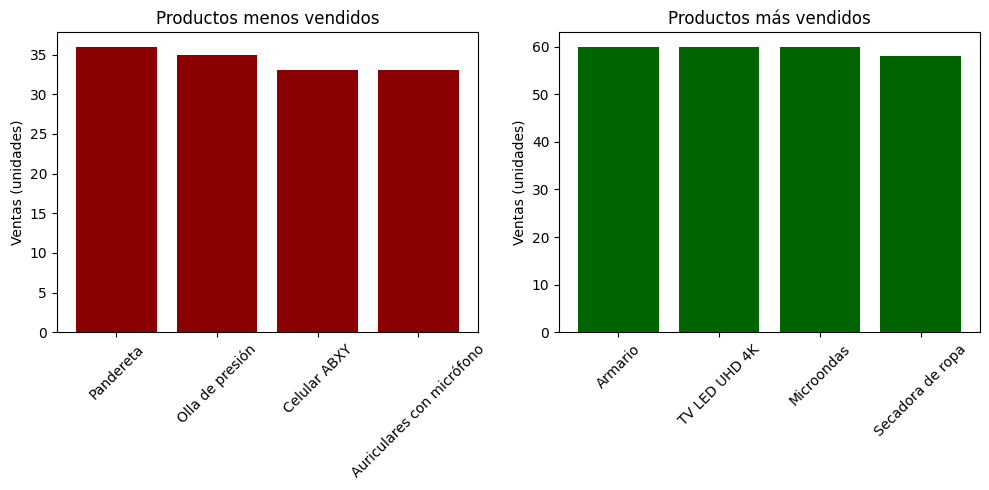

________________________________________________________________________________________________________________________________________________________________

🏪Tienda 2
🛒Productos con menores y mayores ventas


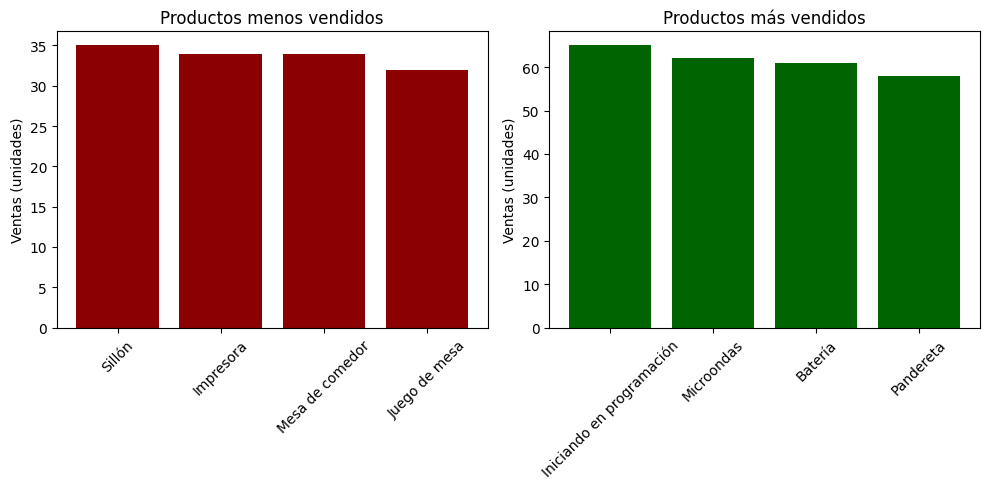

________________________________________________________________________________________________________________________________________________________________

🏪Tienda 3
🛒Productos con menores y mayores ventas


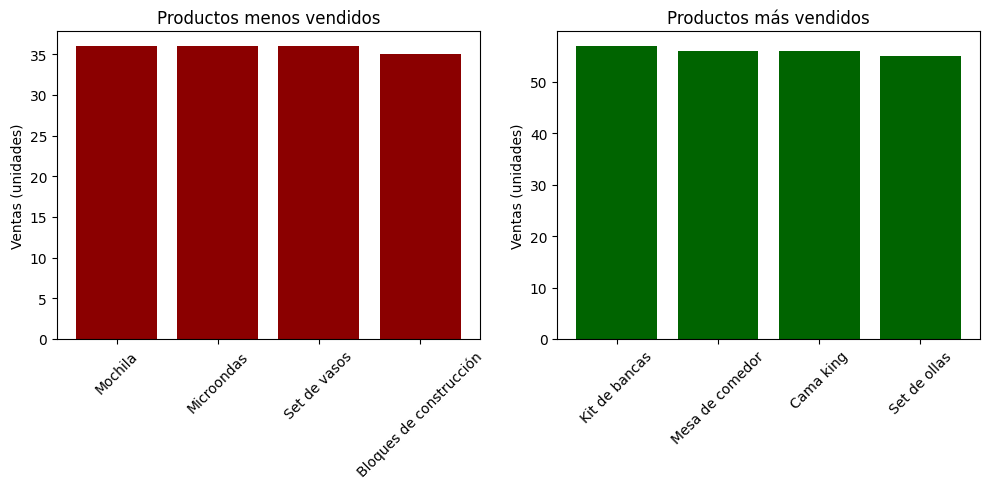

________________________________________________________________________________________________________________________________________________________________

🏪Tienda 4
🛒Productos con menores y mayores ventas


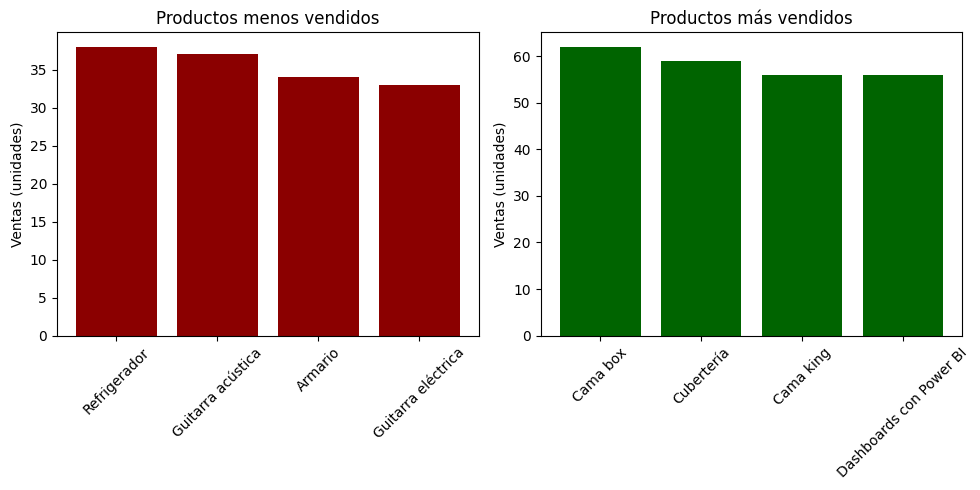

________________________________________________________________________________________________________________________________________________________________


In [12]:
num_tienda = 1

for set_datos in lista_set_datos:

    prod_men_vend = set_datos.producto.value_counts().tail(4)
    prod_men_vend = prod_men_vend.reset_index()
    prod_men_vend.columns = ["Producto","Ventas"]

    prod_mas_vend = set_datos.producto.value_counts().head(4)
    prod_mas_vend = prod_mas_vend.reset_index()
    prod_mas_vend.columns = ["Producto","Ventas"]

    print(f"\n🏪Tienda {num_tienda}")
    print(f"🛒Productos con menores y mayores ventas")
    num_tienda+=1

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 fila, 2 columnas

    # Gráfico de productos menos vendidos
    axes[0].bar(prod_men_vend["Producto"], prod_men_vend["Ventas"], color="darkred")
    axes[0].set_title("Productos menos vendidos")
    axes[0].set_ylabel("Ventas (unidades)")
    axes[0].tick_params(axis="x", rotation=45)

    # Gráfico de productos menos vendidos
    axes[1].bar(prod_mas_vend["Producto"], prod_mas_vend["Ventas"], color="darkgreen")
    axes[1].set_title("Productos más vendidos")
    axes[1].set_ylabel("Ventas (unidades)")
    axes[1].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()
    print("_"*160)

# Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío

In [13]:
num_tienda = 1
lista_costos_tienda = []

for set_datos in lista_set_datos:
    cost_prom_env = set_datos["costo_de_envio"].mean()

    print(f"\n🏪Tienda {num_tienda}")
    print(f"💰Costo promedio de envio: {cost_prom_env:.2f}")
    print("_"*36)

    num_tienda+=1
    lista_costos_tienda.append(cost_prom_env)


🏪Tienda 1
💰Costo promedio de envio: 26018.61
____________________________________

🏪Tienda 2
💰Costo promedio de envio: 25216.24
____________________________________

🏪Tienda 3
💰Costo promedio de envio: 24805.68
____________________________________

🏪Tienda 4
💰Costo promedio de envio: 23459.46
____________________________________


# Visualizaciones

In [14]:
tiendas = ["tienda1","tienda2","tienda3","tienda4"]

datos_tiendas_full = pd.DataFrame({
    "Tienda":tiendas,
    "Ingresos":lista_ingresos})

datos_tiendas_full["Ingresos"] = datos_tiendas_full["Ingresos"]/1000000 


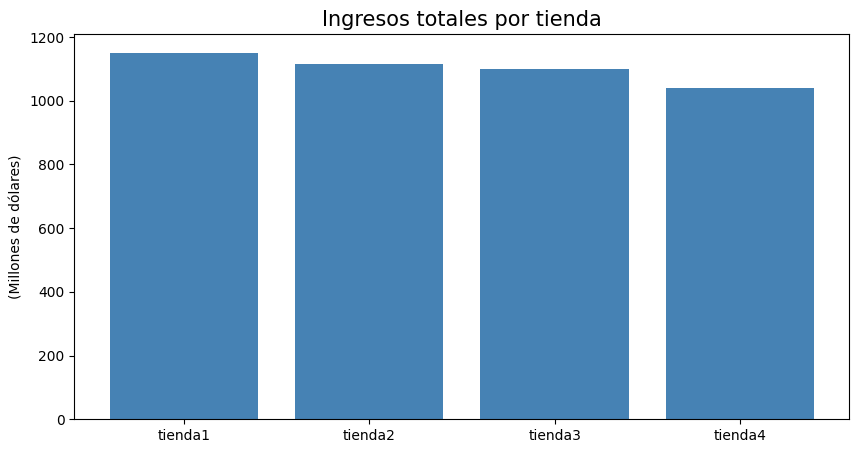

In [15]:
fig, axes = plt.subplots(figsize = (10,5))

axes.bar(datos_tiendas_full["Tienda"],datos_tiendas_full["Ingresos"], color = "steelblue")
axes.set_title("Ingresos totales por tienda", fontsize = 15)
axes.set_ylabel("(Millones de dólares)")

#fig.text(0.7,-0.05,"fuente: Elaboración propia")

plt.show()

In [16]:
import seaborn as sns

from matplotlib.ticker import MaxNLocator


In [17]:
#Añadir columna años
for set_datos in lista_set_datos:
    set_datos["Año"] = set_datos["fecha_de_compra"].dt.year
    set_datos["Año"] = set_datos["Año"].astype("int")

🏪Tienda 1
Evolución de los ingresos promedios anuales entre el 2020 y 2023


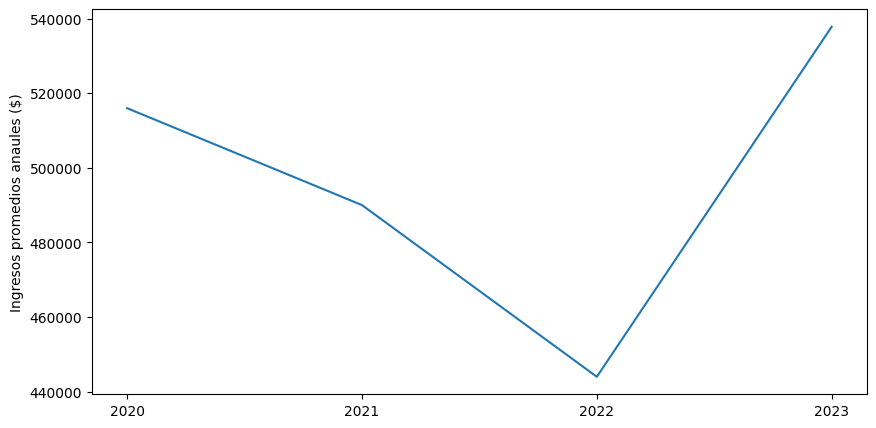

________________________________________________________________________________________________________________________________________________________________
🏪Tienda 2
Evolución de los ingresos promedios anuales entre el 2020 y 2023


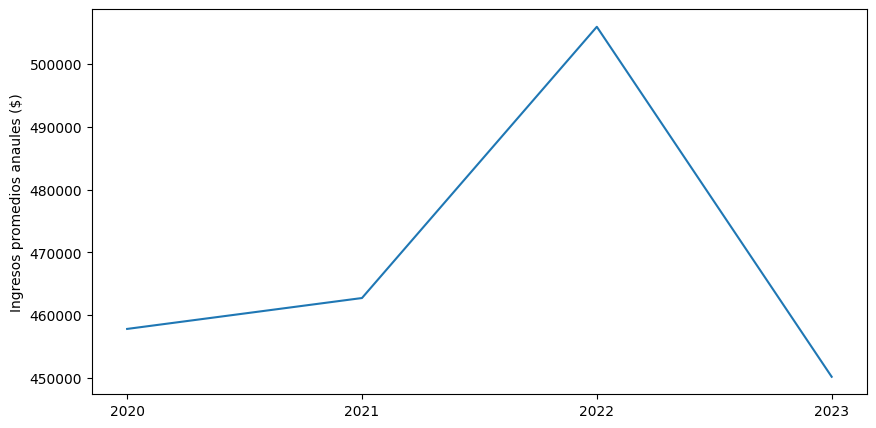

________________________________________________________________________________________________________________________________________________________________
🏪Tienda 3
Evolución de los ingresos promedios anuales entre el 2020 y 2023


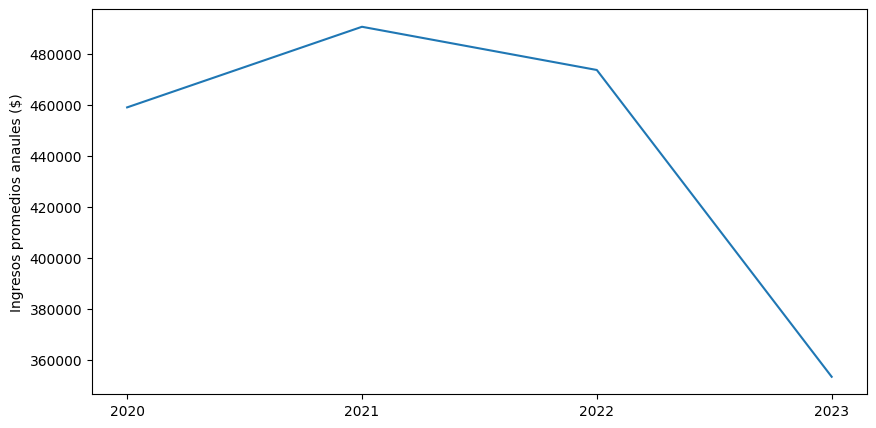

________________________________________________________________________________________________________________________________________________________________
🏪Tienda 4
Evolución de los ingresos promedios anuales entre el 2020 y 2023


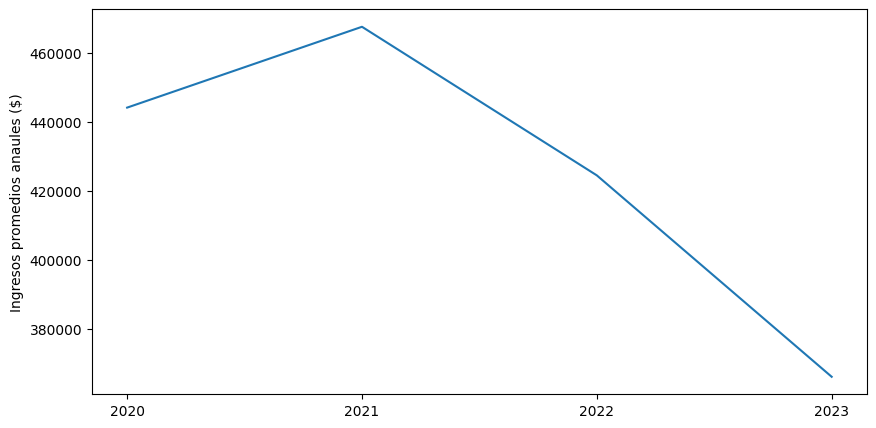

________________________________________________________________________________________________________________________________________________________________


In [18]:
#ingreso promedio anual
num_tienda = 1 #contador

for set_datos in lista_set_datos:
    datos_temp = set_datos.groupby("Año").agg({"precio":"mean"})
    datos_temp = datos_temp.reset_index()

    print(f"🏪Tienda {num_tienda}\nEvolución de los ingresos promedios anuales entre el 2020 y 2023")
    fig, ax = plt.subplots(figsize = (10,5))

    ax.plot(datos_temp["Año"], datos_temp["precio"])

    ax.set_ylabel("Ingresos promedios anaules ($)")

    ax.xaxis.set_major_locator(MaxNLocator(integer=True)) 

    plt.show()
    print("_"*160)

    num_tienda+=1 #sumar 1

🏪Tienda 1
Evolución de los costos promedio anuales en envios entre el 2020 y 2023


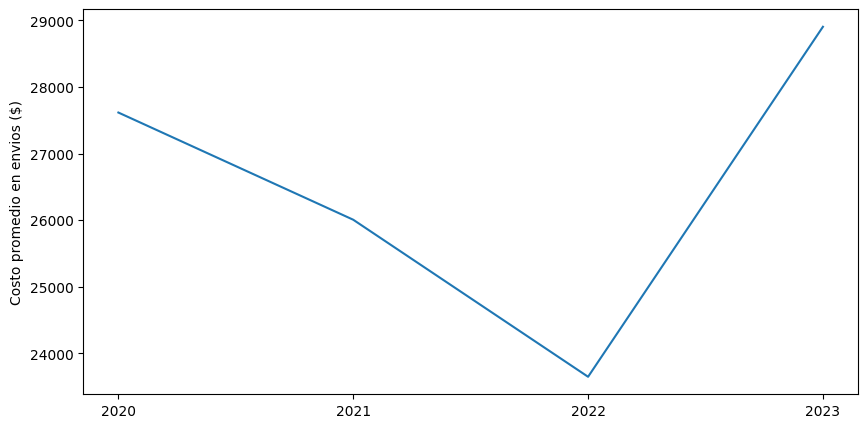

________________________________________________________________________________________________________________________________________________________________
🏪Tienda 2
Evolución de los costos promedio anuales en envios entre el 2020 y 2023


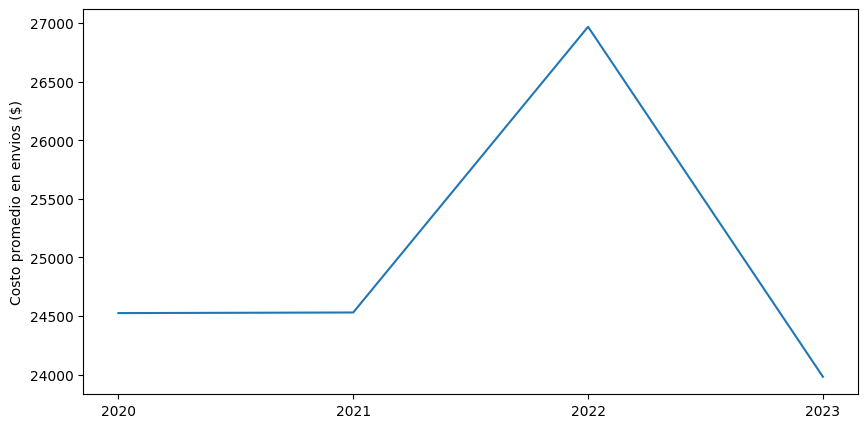

________________________________________________________________________________________________________________________________________________________________
🏪Tienda 3
Evolución de los costos promedio anuales en envios entre el 2020 y 2023


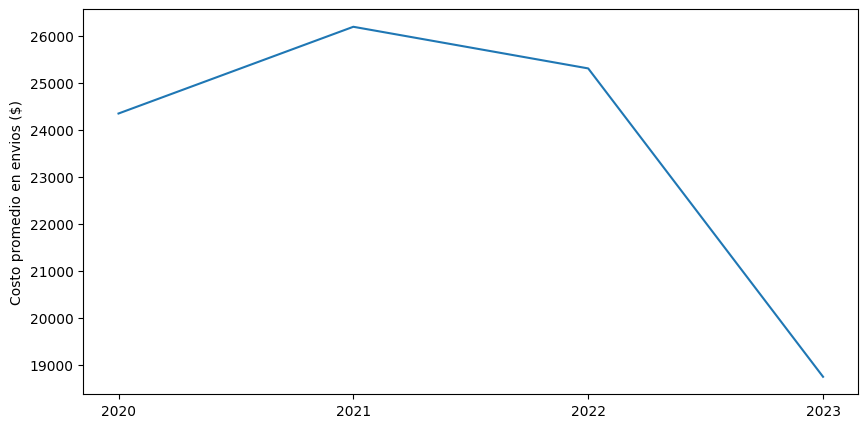

________________________________________________________________________________________________________________________________________________________________
🏪Tienda 4
Evolución de los costos promedio anuales en envios entre el 2020 y 2023


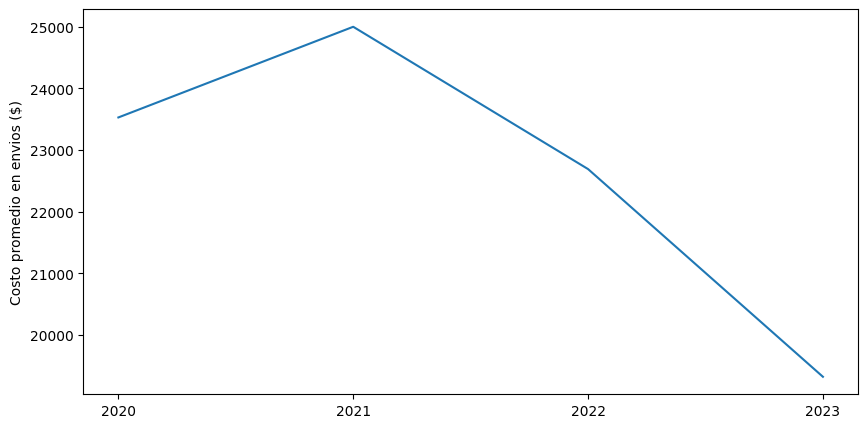

________________________________________________________________________________________________________________________________________________________________


In [19]:
#Costo promedio anual de envios
num_tienda = 1 #contador

for set_datos in lista_set_datos:
    datos_temp = set_datos.groupby("Año").agg({"costo_de_envio":"mean"})
    datos_temp = datos_temp.reset_index()

    print(f"🏪Tienda {num_tienda}\nEvolución de los costos promedio anuales en envios entre el 2020 y 2023")
    fig, ax = plt.subplots(figsize = (10,5))

    ax.plot(datos_temp["Año"], datos_temp["costo_de_envio"])

    ax.set_ylabel("Costo promedio en envios ($)")

    ax.xaxis.set_major_locator(MaxNLocator(integer=True)) 

    plt.show()
    print("_"*160)

    num_tienda+=1 #sumar 1


🏪Tienda 1
Ventas por categorias


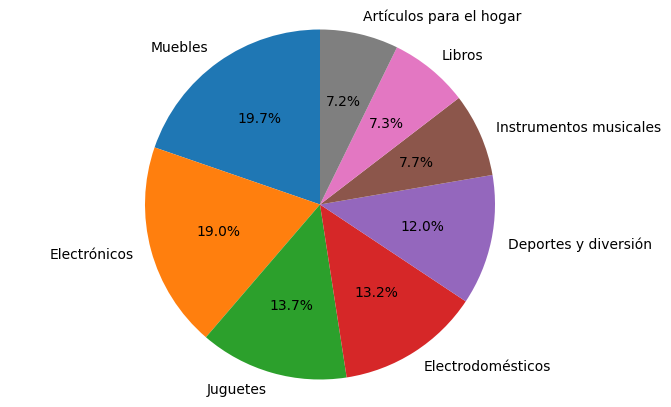

________________________________________________________________________________________________________________________________________________________________

🏪Tienda 2
Ventas por categorias


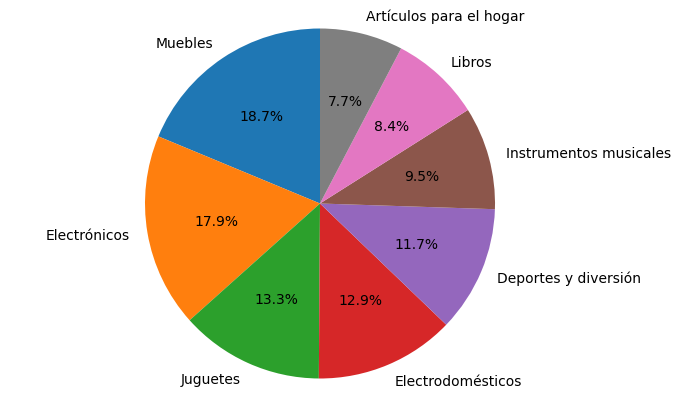

________________________________________________________________________________________________________________________________________________________________

🏪Tienda 3
Ventas por categorias


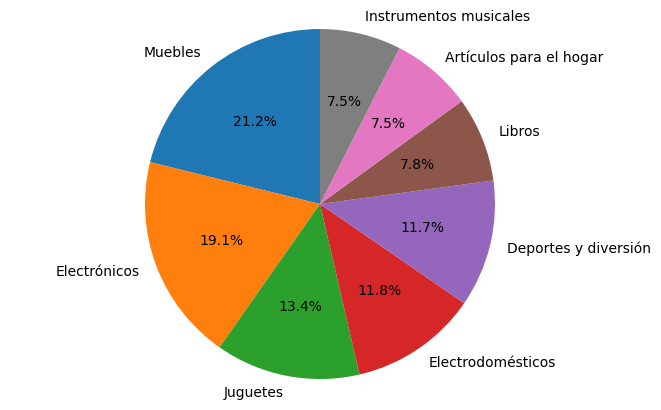

________________________________________________________________________________________________________________________________________________________________

🏪Tienda 4
Ventas por categorias


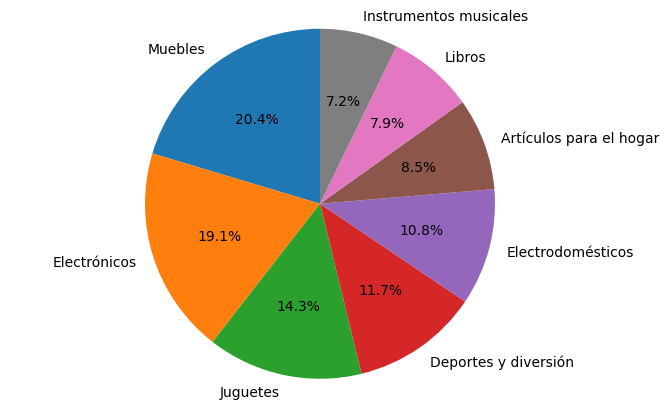

________________________________________________________________________________________________________________________________________________________________


In [ ]:
num_tienda = 1
for set_datos in lista_set_datos:
    ventas_categoria = set_datos["categoria_del_producto"].value_counts().sort_values(ascending=False)
    ventas_categoria = ventas_categoria.reset_index()
    ventas_categoria.columns = ["Categoria","Uds.Vend"]

    print(f"\n🏪Tienda {num_tienda}")
    print("Ventas por categorias")
    num_tienda+=1

    fig, ax = plt.subplots(figsize = (8,5))

    ax.pie(ventas_categoria["Uds.Vend"], labels =ventas_categoria["Categoria"], autopct= "%1.1f%%", startangle = 90)
    ax.axis("equal")

    plt.show()

    print("_"*160)

# Análisis extras

In [71]:
for i in range(1,4): 
    print((lista_ingresos[0]-lista_ingresos[i])/1000000) #Ingresos de la tienda 1 vs cada una de las demás

34.5369
52.8608
112.5047


In [72]:
for i in range(1,4):
    print((lista_costos_tienda[0]-lista_costos_tienda[i])/1000000) #Costos de envío de la tienda 1 vs cada una de las demás

0.0008023738872403555
0.001212929207291225
0.0025591524132398953


In [73]:
for i in lista_set_datos:

    datos_temp =i.groupby("producto")["precio"].sum().sort_values(ascending=False) #Producto que más ingresos genera por tienda
    print("tiendas")
    print(f"{datos_temp.head(5)}")
    print("_"*60)

tiendas
producto
TV LED UHD 4K       142150200.0
Refrigerador        112143300.0
Iphone 15            97902200.0
Smart TV             67452100.0
Lavadora de ropa     65783600.0
Name: precio, dtype: float64
____________________________________________________________
tiendas
producto
Iphone 15           113225800.0
TV LED UHD 4K       103375000.0
Refrigerador         97632500.0
Lavadora de ropa     66762300.0
Smart TV             61142000.0
Name: precio, dtype: float64
____________________________________________________________
tiendas
producto
Refrigerador     99889700.0
TV LED UHD 4K    96669100.0
Iphone 15        93225700.0
Smart TV         78837300.0
Lavavajillas     64364800.0
Name: precio, dtype: float64
____________________________________________________________
tiendas
producto
Iphone 15        96697500.0
TV LED UHD 4K    90295300.0
Smart TV         82790400.0
Refrigerador     75271900.0
Tablet ABXY      56723100.0
Name: precio, dtype: float64
_________________________________

C:\Users\carlo\AppData\Local\Temp\ipykernel_19056\182137098.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos_temp =i.groupby("producto")["precio"].sum().sort_values(ascending=False) #Producto que más ingresos genera por tienda


In [74]:
for set_datos in lista_set_datos:
    datos_temp = set_datos[set_datos["producto"] == "TV LED UHD 4K"].value_counts().sum() #Número de ventas del producto TV LED UDH 4K por cada tienda
    print(datos_temp)

60
45
42
40


In [75]:
for set_datos in lista_set_datos:

    datos_temp = set_datos[["Año","producto"]]

    datos_temp = datos_temp[datos_temp["producto"] == "TV LED UHD 4K"] #Número de ventas por año para el producto TV LED UHD 4K por tienda

    print(datos_temp.groupby("Año").count())

      producto
Año           
2020        14
2021        26
2022        13
2023         7
      producto
Año           
2020        13
2021        15
2022        15
2023         2
      producto
Año           
2020        13
2021        13
2022        16
      producto
Año           
2020        18
2021        15
2022         6
2023         1


# *Principales hallazgos*

El objetivo del presente análisis de datos es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos. Para lograr el objetivo se analizaron las principales variables sobre ventas, costos, rendimiento, reseñas etc, en cada una de las cuatro tiendas de Alura Store. Acontinuación se presentan los principales resultados:  

Las facturaciones (ingresos) total acumuladas a 2023 poseen niveles relativamente dispares, la tienda 1 es quien lidera las ventas; 34, 52 y 112 millones de unidades monetarias más que la tienda 2, 3 y 4 respectivamente, siendo la tienda 4 la que posee ventas considerablemente bajas. Sin embargo, al analizar los ingresos promedios anuales se observa que la tienda 1 es quien mantenía las ventas bajas antes de 2022, después de ese mismo año las ventas incrementaron virtiginosamente, por otro lados las ventas de las demás tiendas caen sin retornos. (aunque para la tienda 4 la caida sucede desde 2021).

Los costos de envíos totales a 2023 para las cuatro tiendas son relativamente similares, aunque al analizar las trayectorias anuales se observa que la tienda 1 mantenía los costos en envíos más bajos, sin embargo a partir de 2022 al incrementar las facturaciones (ingresos) estos aumentan pero a niveles estables en relación a las demás tiendas. Para la tienda 4 los costos de envío caen en 2021 consistente con la caida de los ingresos analizados anteriormente. 

Las calificaciones que los clientes han dejado para cuatro tiendas se mentienen equitativas, siendo la tienda 1 que a pesar de mejorar sustancialmente en 2022 es quien mantienen la calificación menor a 4, pero lo suficiente como para estar a niveles similares a las demás, por lo que las calificaciones de los clientes no distinguen ( a simple vista) la mejor o peor tienda en términos de atención al cliente.

Las ventas a 2023 por categorías se mantienen estables y similares para las cuatro tiendas, por lo que ninguna tienda en términos acumualados brutos no ha dejando de vender más ni menos en relación a las demás.

Por otro lado, al analizar los cinco productos más y menos vendidos de cada tienda, se observa que la tienda 1 es la que más vende el producto : *TV LED UHD 4K* siendo este el más caro de toda Alura Store, además que se encuentra como el segundo producto más vendido y qué más ingresos genera para la tienda 1 con 112.15 millones de unidades monetarias.

El detalle está, en que las ventas para dicho produto cae en todas las tiendas, pero para la tienda 1 se mantiene relativamente estable por lo que se posiciona como unos de los principales factores que ayudan a sacar ventaja a la tienda 1 en relación a las demás.

# Conclusión

A modo de conclusión, basado en el análisis de datos realizado para cada una de las cuatro tiendas de Alura Store, sean encontrados resultados evidentes sobre la tienda 1 que ha venido recuperandose y mejorando considerablemente en estos último 3 años, pero por otro lado dejando en evidencia la tienda 4 que sea ha deteriorado gradualmente desde 2021, siendo la tienda que menos ingreso percibe y los costos se mantienen similares a las demás, pese a qué percibe menos ingresos, aunque el número de ventas en artículos varios se ha mantendio, la venta del producto que más ganancia deja a la empresa ha caido, las calificaciones de los clientes no revelan nada importante para justificar el mal desempeño que ha vendio adoptando la tienda, sumado a ello, entre sus productos más vendidos no destaca ninguno de los más importante para Alura Store. Por tanto, la mejor opción que puede tomar el Sr. João para dar inicio a su nuevo proyecto de Alura Store ,es vender la tienda 4.